In [2]:
import sys
sys.path.append("/media/hdd/viscent/SR-UNet")
from utils.inference_utils import *

In [3]:
hcp_loader,_,_ = get_dataloader(dataset='hcp',modality='t2',num_samples=100)
dhcp_loader,_,_ = get_dataloader(dataset='dhcp',modality='t2',num_samples=100)

[09/29/22 18:11:21] INFO     colossalai - root - INFO: Creating dataset with 80 examples

  0%|          | 0/80 [00:00<?, ?it/s]

[09/29/22 18:11:22] INFO     colossalai - root - INFO: Creating dataset with 20 examples

  0%|          | 0/20 [00:00<?, ?it/s]

[09/29/22 18:11:23] INFO     colossalai - root - INFO: Creating dataset with 80 examples

                    INFO     colossalai - root - INFO: length of list_images_t1: 80

  0%|          | 0/80 [00:00<?, ?it/s]

[09/29/22 18:11:25] INFO     colossalai - root - INFO: Creating dataset with 20 examples

                    INFO     colossalai - root - INFO: length of list_images_t1: 20

  0%|          | 0/20 [00:00<?, ?it/s]

In [3]:
image_tensor, target_tensor = next(iter(dhcp_loader))

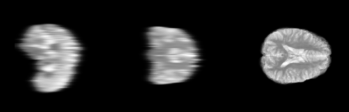

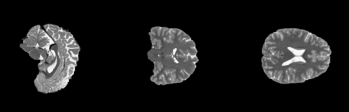

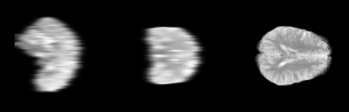

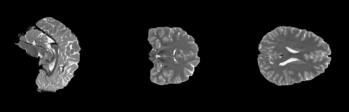

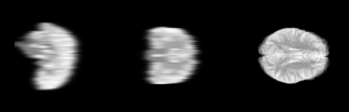

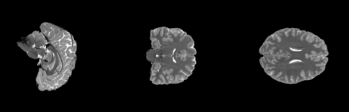

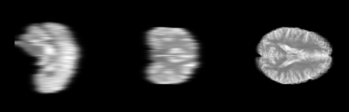

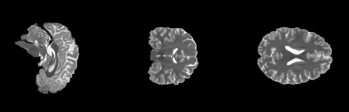

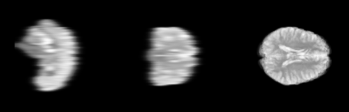

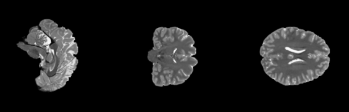

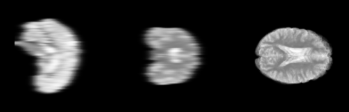

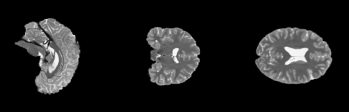

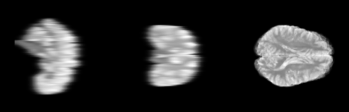

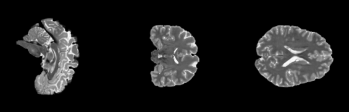

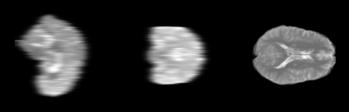

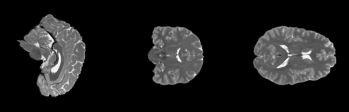

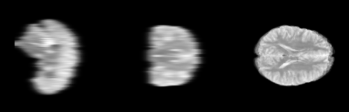

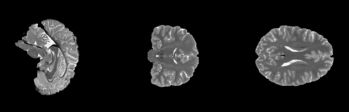

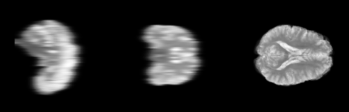

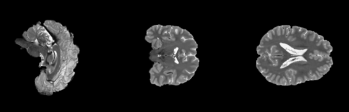

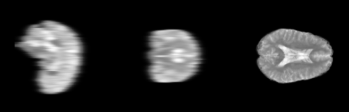

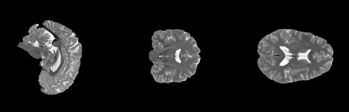

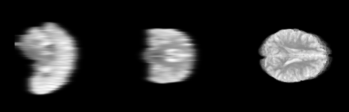

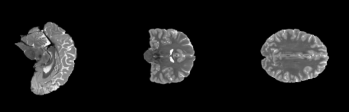

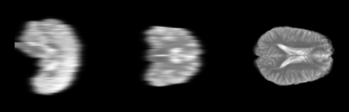

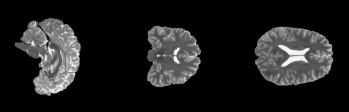

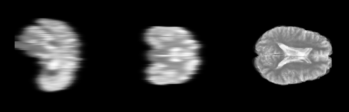

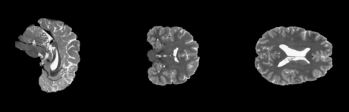

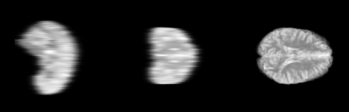

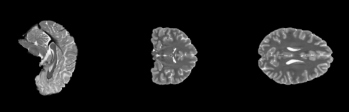

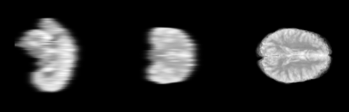

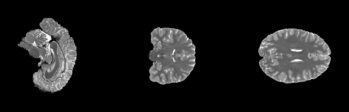

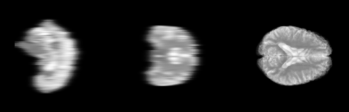

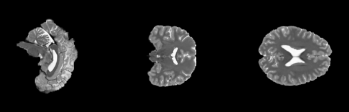

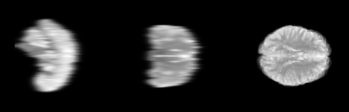

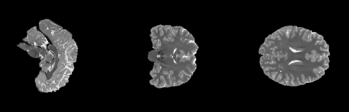

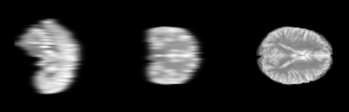

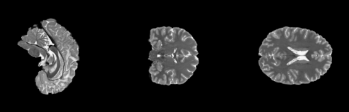

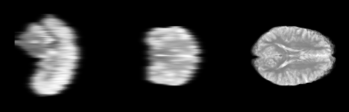

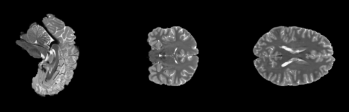

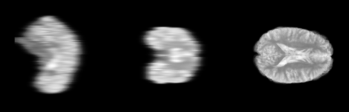

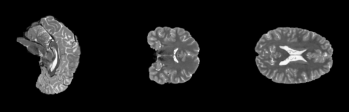

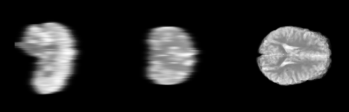

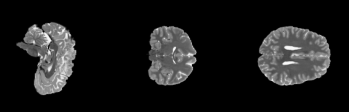

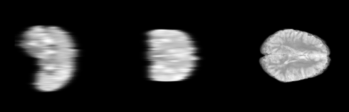

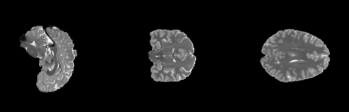

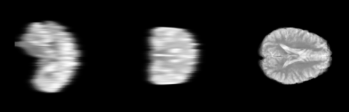

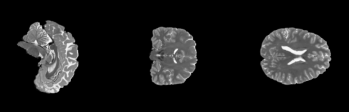

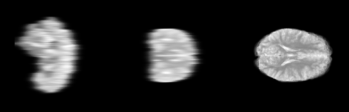

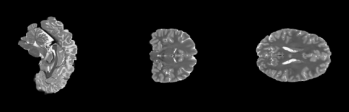

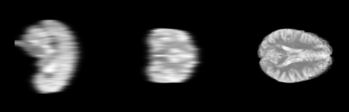

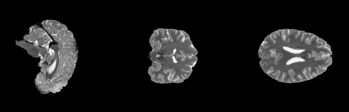

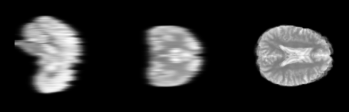

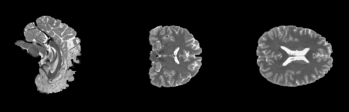

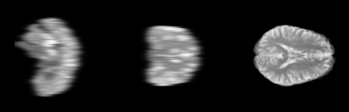

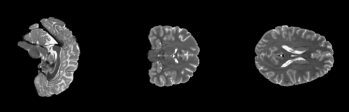

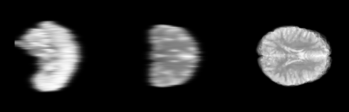

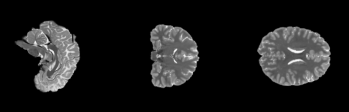

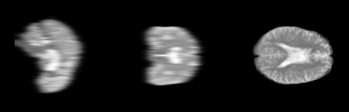

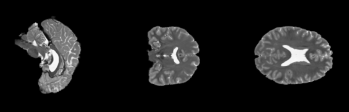

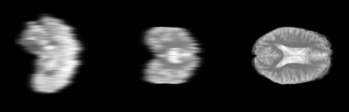

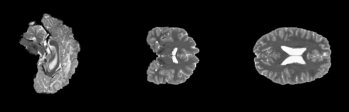

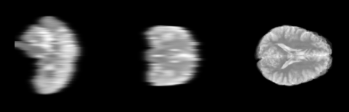

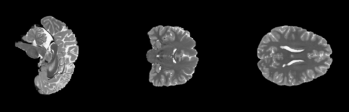

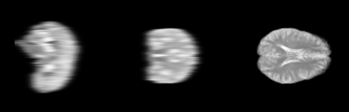

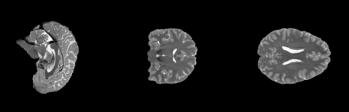

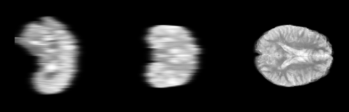

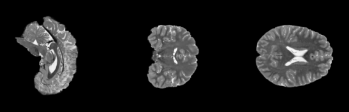

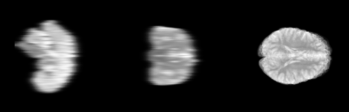

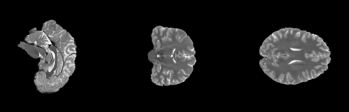

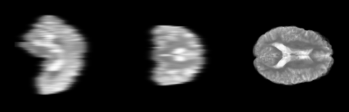

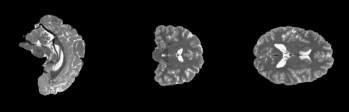

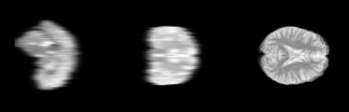

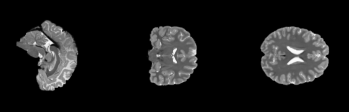

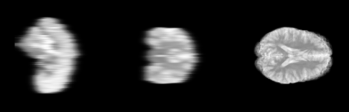

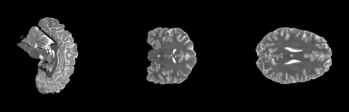

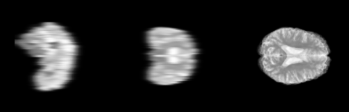

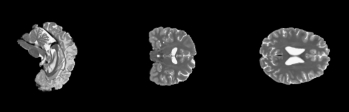

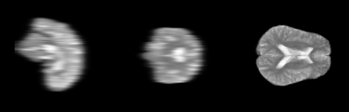

KeyboardInterrupt: 

In [4]:
for image_tensor, target_tensor in hcp_loader:
    display_multiplanar_center(image_tensor[0,0].cpu().numpy())
    display_multiplanar_center(target_tensor[0,0].cpu().numpy())

In [ ]:
display_multiplanar_center(image_tensor[0,0].cpu().numpy())
display_multiplanar_center(target_tensor[0,0].cpu().numpy())

In [ ]:
image = sitk.ReadImage('/media/hdd/viscent/SR-UNet/inference/Inference_FLYWHEEL_BROWN/input_reg/003.nii.gz')
image_array = sitk.GetArrayFromImage(image)
display_multiplanar_center(image_array)

In [ ]:
subject = tio.Subject(
    t2=tio.ScalarImage('/media/hdd/viscent/SR-UNet/dev/FLYWHEEL_BROWN/BROWN/SUBJECTS/BAMBAM26J/SESSIONS/2022-02-18 14_53_31/ACQUISITIONS/2 - T2 (AXI) - FAST (DL)-NOT FOR DIAGNOSTIC USE/FILES/2_T2_AXI_FAST_DL_NOT_FOR_DIAGNOSTIC_USE.nii.gz'),)
    
transform_brown_1 = tio.Compose([
    tio.transforms.RescaleIntensity(0., 1.),
    tio.transforms.ToCanonical(),
    tio.transforms.Resample((1.,1.,1.)),
])
subject = transform_brown_1(subject)
edge_max = max(subject.t2.data.shape)
padding = ((edge_max - subject.t2.data.shape[1]) // 2, 
            (edge_max - subject.t2.data.shape[2]) // 2,
                (edge_max - subject.t2.data.shape[3]) // 2)
transform_brown_2 = tio.Compose([
    tio.Pad(padding),
    tio.transforms.Resize((160,160,160)),
])
subject = transform_brown_2(subject)

In [ ]:
display_multiplanar_center(subject.t2.data[0])

In [ ]:
image = sitk.GetImageFromArray(image_tensor[0, 0].detach().cpu().numpy()*4096)
sitk.WriteImage(image, 'Input_HCP.nii.gz')

In [ ]:
image = sitk.GetImageFromArray(target_tensor[0, 0].detach().cpu().numpy()*4096)
sitk.WriteImage(image, 'Template_HCP.nii.gz')

In [ ]:
image_tensor, target_tensor = load_image(dataset='dhcp',modality='t2')

In [5]:
image = sitk.GetImageFromArray(target_tensor[0, 0].detach().cpu().numpy()*4096)
sitk.WriteImage(image, 'Template_dHCP.nii.gz')

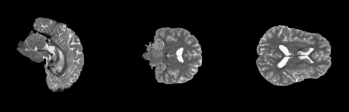

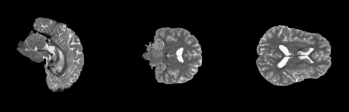

In [4]:
image = sitk.ReadImage('Template_dHCP.nii.gz')
image_array = sitk.GetArrayFromImage(image)
display_multiplanar_center(image_array)

In [6]:
image.get

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

(120, 146, 36)
(1.5, 1.5, 5.0)


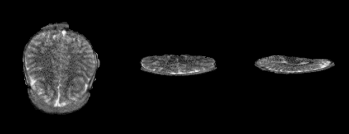

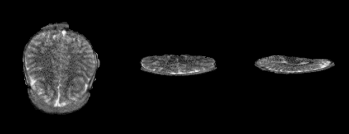

In [18]:
image = sitk.ReadImage('/media/hdd/viscent/SR-UNet/inference/Inference_FLYWHEEL_BROWN/input_brain/002.nii.gz')
image_array = sitk.GetArrayFromImage(image)
print(image.GetSize())
print(image.GetSpacing())
display_multiplanar_center(image_array)